In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
df = pd.read_csv("Supermart Grocery Sales - Retail Analytics Dataset.csv")

In [19]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [21]:
df.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [22]:
df.drop_duplicates(inplace=True)
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

In [41]:
df['month_no'] = df['Order Date'].dt.month
df['Month'] = df['Order Date'].dt.strftime('%B')
df['year'] = df['Order Date'].dt.year

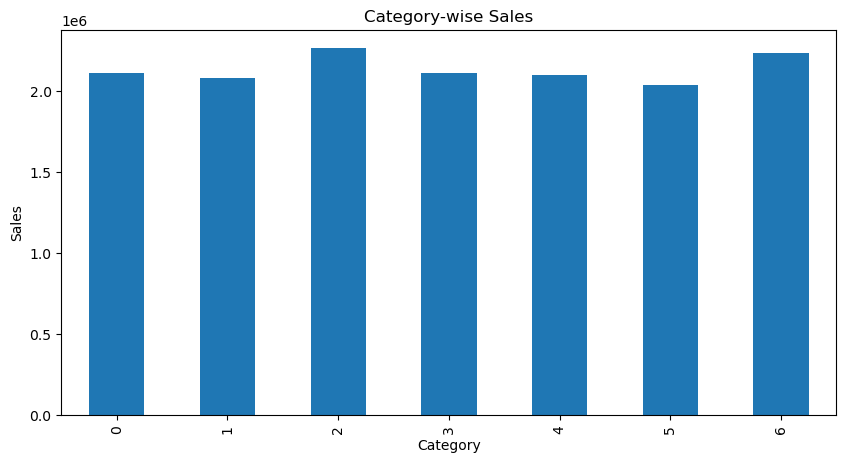

In [42]:
plt.figure(figsize=(10,5))
df.groupby('Category')['Sales'].sum().plot(kind='bar')
plt.title('Category-wise Sales')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

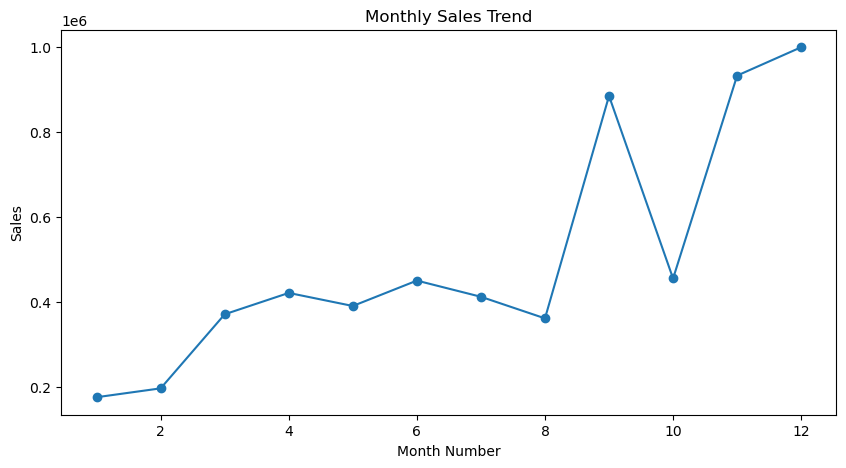

In [43]:
monthly_sales = df.groupby('month_no')['Sales'].sum()
plt.figure(figsize=(10,5))
monthly_sales.plot(marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month Number')
plt.ylabel('Sales')
plt.show()

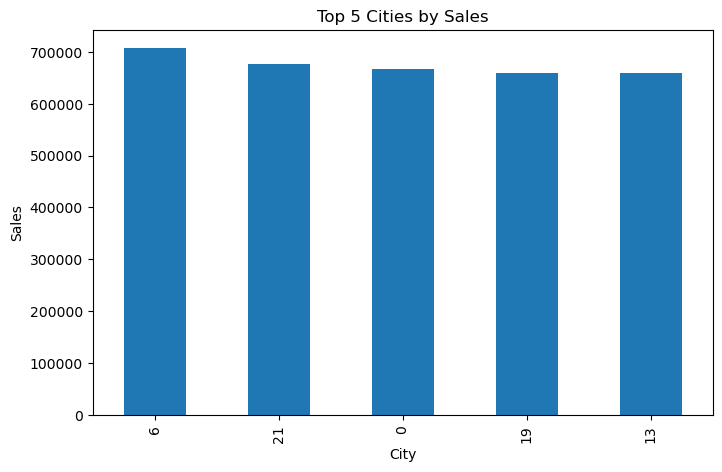

In [44]:
top_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(8,5))
top_cities.plot(kind='bar')
plt.title('Top 5 Cities by Sales')
plt.xlabel('City')
plt.ylabel('Sales')
plt.show()

In [45]:
le = LabelEncoder()
cat_cols = ['Category', 'Sub Category', 'City', 'Region', 'State', 'Month']
for col in cat_cols:
    df[col] = le.fit_transform(df[col]) 

In [49]:
features = df.drop(columns=['Order ID', 'Customer Name', 'Order Date', 'Sales'])
target = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

In [53]:
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # removes NaNs
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 212732.49895890485
R2 Score: 0.35499761174120614
